# $$
\text{Devoir à la maison N°1}
$$

#### Exercice 1. _Méthode d'Archimède_.

Nous cherchons à calculer une valeur approchée du nombre $\pi$ par la méthode d'Archimède, à l'aide de la méthode de Héron.

1. Définir une fonction _Heron_ qui prend en entrée deux nombres $a > 0$ et $\varepsilon > 0$, et renvoie une valeur approchée du nombre $\sqrt{a}$ par la méthode de Héron :
$$
x_0 = \frac{1 + a}{2}, \quad \text{ et } \quad \forall n \geq 0, \, x_{n+ 1} = \frac{x_n^2 + a}{2 x_n},
$$
à une erreur de l'ordre de $\varepsilon$ près.

In [1]:
from numpy import *

def Heron(a, eps):
    x0 = (1 + a)/2
    x1 = (x0**2 + a)/(2*x0)
    while abs(x1-x0) > eps:
        x0 = x1
        x1 = (x0**2 + a)/(2*x0)
    return x1

# Test de la fonction Heron pour a = 25 et eps = 1e-15

a = 25
eps = 1e-15
l = Heron(a, eps)
print("Heron(a, eps) =", l,"\n")
print("Erreur(Heron) =", l-sqrt(a),"\n")

Heron(a, eps) = 5.0 

Erreur(Heron) = 0.0 



2. Soit
$$
\forall n \geq 1, \, c_n = \cos \Big( \frac{\pi}{2^n} \Big) \quad \text{ et } \quad s_n = \sin \Big( \frac{\pi}{2^n} \Big).
$$
Nous rappelons que ces suites vérifient $c_1 = 0$, $s_1 = 1$ et
$$
\forall n \geq 1, \, c_{n + 1} = \sqrt{\frac{1 + c_n}{2}} \quad \text{ et } \quad s_{n + 1} = \sqrt{\frac{1 - c_n}{2}}.
$$

a. Définir une fonction _Trigo_ qui prend en entrée un entier $n \geq 1$ et un nombre $\varepsilon > 0$, et renvoie une valeur approchée des nombres $c_n$ et $s_n$ calculés par la fonction _Heron_, à une erreur de l'ordre de $\varepsilon$ près.

In [2]:
def Trigo(n, eps):
    c = 0
    s = 1
    for i in range(0,n-1):
        s = Heron((1-c)/2, eps)
        c = Heron((1+c)/2, eps)
    return c,s

# Test de la fonction Trigo pour n = 20 et eps = 1e-15

n = 20
c,s = Trigo(n, eps)
print("Trigo(n, eps) =", c, s,"\n")
print("Erreur(Trigo) =", c-cos(pi/2**n), s-sin(pi/2**n),"\n")

Trigo(n, eps) = 0.9999999999955118 2.9960599457786747e-06 

Erreur(Trigo) = 0.0 3.719444013867919e-12 



b. Définir une fonction _Archimede_ qui prend en entrée un entier $n \geq 1$ et un nombre $\varepsilon > 0$, et renvoie une valeur approchée du nombre $\pi$, après $n$ itérations de la fonction _Trigo_ avec une erreur de l'ordre de $\varepsilon$.

In [3]:
def Archimede(n, eps):
    c,s = Trigo(n, eps)
    return 2**n*s

# Test de la fonction Archimede pour n = 20 et esp = 1e-15

pi1 = Archimede(n, eps)
print("Archimede(n,eps) =", Archimede(n, eps),"\n")
print("Erreur(Archimede) =", pi1 - pi,"\n")

Archimede(n,eps) = 3.1415965537048196 

Erreur(Archimede) = 3.900115026489459e-06 



3.a. Pour $\varepsilon = 10^{-15}$ fixé, tracer la courbe qui à un entier $1 \leq n \leq 50$, associe la valeur donnée par la fonction $Archimede(n, \varepsilon)$.

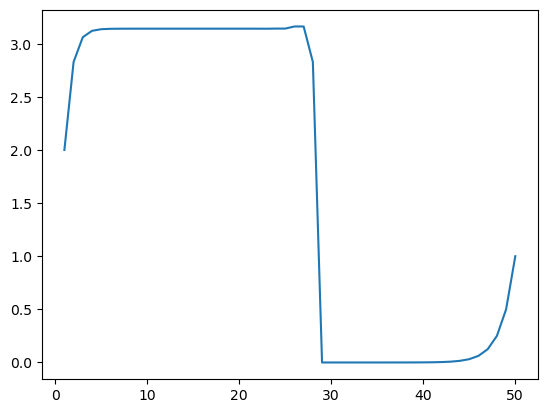

In [4]:
from matplotlib.pyplot import *

A = []
B = []
for i in range(0,50):
    A.append(i + 1)
    B.append(Archimede(i + 1, eps))
plot(A, B)
show()

b. Tracer dans une même fenêtre graphique la courbe qui à un entier $1 \leq n \leq 50$ associe la valeur $2^n \sin(\pi/2^n)$.

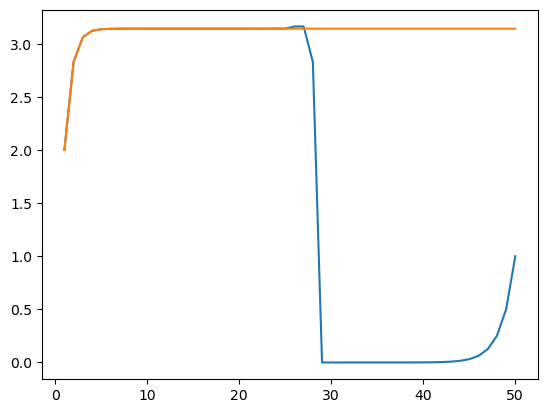

In [5]:
C = []
for i in range(0,50):
    C.append(2**(i + 1) * sin(pi/2**(i + 1)))
plot(A, B)
plot(A, C)
show()

c. Qu'observez-vous ? Comment interprétez-vous cette observation ?

Lorsque n est trop grand, la valeur du nombre $s$ donné par l'algorithme $Trigo(n,\varepsilon)$ est plus petite que l'erreur $\varepsilon$. L'algorithme s'arrête avant d'avoir atteint une valeur approchée suffisamment précise de $s$. Le résultat de la multiplication de la valeur de $s$ déterminée par cet algorithme et du très grand nombre $2^n$ n'est plus une approximation valable du nombre $\pi$.


#### Exercice 2. _Algorithme des différences divisées_.

1.a. Définir une fonction _DifferenceDivisee_ qui prend en entrée une fonction de la variable réelle $f$ et une liste de coefficients $X = [x_0, \ldots, x_N]$, et renvoie la table des différences divisées successives de la fonction $f$ aux points $x_0$, $\ldots$, et $x_N$, définies par les formules de récurrence :
$$
\forall 0 \leq k \leq N, \, f[x_k] = f(x_k),
$$
et
$$
\forall 0 \leq j < k \leq N, \, f[x_j, \ldots x_k] = \frac{f[x_{j + 1}, \ldots, x_k] - f[x_j, \ldots, x_{k - 1}]}{x_k - x_j}.
$$

In [6]:
def DifferenceDivisee(f, X):
    A = []
    for x in X:
        A.append(f(x))
    B = []
    B.append(A)
    for i in range(1, len(X)):
        A = []
        for j in range(0, len(X) - i):
            A.append((B[i-1][j + 1] - B[i - 1][j])/(X[j + i] - X[j]))
        B.append(A)
    return(B)

# Test de la fonction DifferenceDivisee à l'aide de la fonction identité I pour les points d'interpolation 1, 2, 3 et 4

def I(x):
    return x
Z = [1, 2, 3, 4]
print("DifferenceDivisee(I,Z) =",DifferenceDivisee(I, Z),"\n")

DifferenceDivisee(I,Z) = [[1, 2, 3, 4], [1.0, 1.0, 1.0], [0.0, 0.0], [0.0]] 



b. Définir une fonction _Horner_ qui prend en entrée une fonction de la variable réelle $f$ et une liste de coefficients $X = [x_0, \ldots, x_N]$, et renvoie la liste croissante des coefficients du polynôme d'interpolation de Lagrange $P_f(X)$ aux points $x_0$, $\ldots$, et $x_N$, à l'aide de l'algorithme de Hörner :
$$
Q_N(X) = f[x_0, \ldots, x_N] \text{ et } \forall 0 \leq j \leq N- 1, \, Q_j(X) = f[x_0, \ldots, x_j] + (X - x_j) \, Q_{j + 1}(X),
$$
au terme duquel $Q_0(X) = P_f(X)$.

In [7]:
def Horner(f, X):
    B = DifferenceDivisee(f, X)
    Q = [B[len(X) - 1][0]]
    for j in range(1,len(X)):
        Q = [0] + Q
        for k in range(1, len(Q)):
            Q[k - 1] = Q[k - 1] - X[len(X)-j-1] * Q[k]
        Q[0] = Q[0] + B[len(X) - j - 1][0]
    return Q

# Test de la fonction Horner à l'aide de la fonction identité I pour les points d'interpolation 1, 2, 3 et 4

print("Horner(I,Z) =",Horner(I, Z),"\n")

Horner(I,Z) = [0.0, 1.0, 0.0, 0.0] 



c. Définir une fonction _Lagrange_ qui prend en entrée une fonction de la variable réelle $f$, une liste de coefficients $X = [x_0, \ldots, x_N]$ et un nombre réel $x$, et renvoie le calcul par la méthode de Hörner de la valeur au point $x$ du polynôme d'interpolation de Lagrange $P_f(X)$ aux points $x_0$, $\ldots$, et $x_N$.

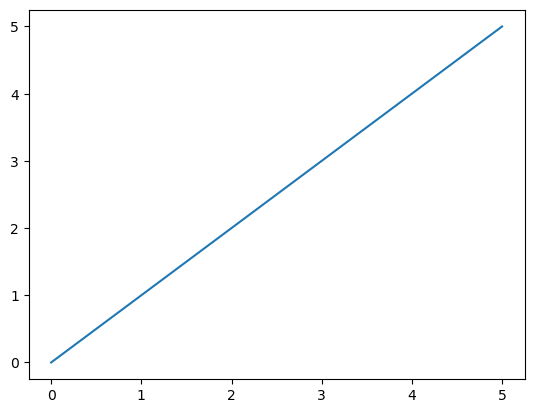

In [8]:
def Lagrange(f, X, x):
    B = DifferenceDivisee(f, X)
    Q = 0
    for j in range(0, len(X)):
        Q = B[len(X) - j - 1][0] + (x - X[len(X) - j - 1]) * Q
    return Q

# Test de la fonction Lagrange à l'aide de la fonction identité I pour les points d'interpolation 1, 2, 3 et 4

A = linspace(0, 5, 100)
L = []
for x in A:
    L.append(Lagrange(I, Z, x))
plot(A, L)
show()

2. _Application_. Soit $y_0 = - 2$, $y_1 = -1$, $y_2 = 0$, $y_3 = 1$ et $y_4 = 2$. Considérons la fonction
$$
\forall y \in \mathbb{R}, \, u(y) = \frac{1}{y^2 + 1}. 
$$

a. Donner la liste des coefficients du polynôme d'interpolation de Lagrange $P_u$ aux points $y_0$, $\ldots$ et $y_4$.

In [9]:
def u(y):
    return 1/(y**2 + 1)
Y = [-2, - 1, 0, 1, 2]
print("Horner(u,Y) =",Horner(u,Y),"\n")

Horner(u,Y) = [1.0, 5.551115123125783e-17, -0.6, -2.7755575615628914e-17, 0.09999999999999999] 



b. Tracer sur le segment $[- 3, 3]$ les graphes de la fonction $u$ et du polynôme d'interpolation de Lagrange $P_u$ obtenu par la fonction _Lagrange_.

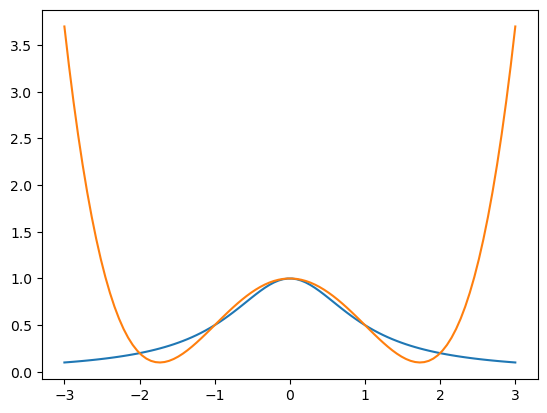

In [10]:
B = linspace(- 3, 3, 100)
U = u(B)
L = []
for y in B:
    L.append(Lagrange(u, Y, y))
plot(B, U)
plot(B, L)
show()